In [3]:
import pandas as pd
import ast

data = pd.read_csv("bh-annotation.csv",encoding='utf-8')

In [4]:
# Clean the walls without catch points
data = data[~(data["region_count"]==0)]

In [5]:
# Delete unused columns
data = data.drop("file_size",axis=1)
data = data.drop("file_attributes",axis=1)

In [6]:
# Calculate how many walls leave
n_walls = data["filename"].nunique()
print(n_walls)

15


In [7]:
import sys
sys.path.append("../src")

import route_parser as rp

walls = rp.hold_centers(data)

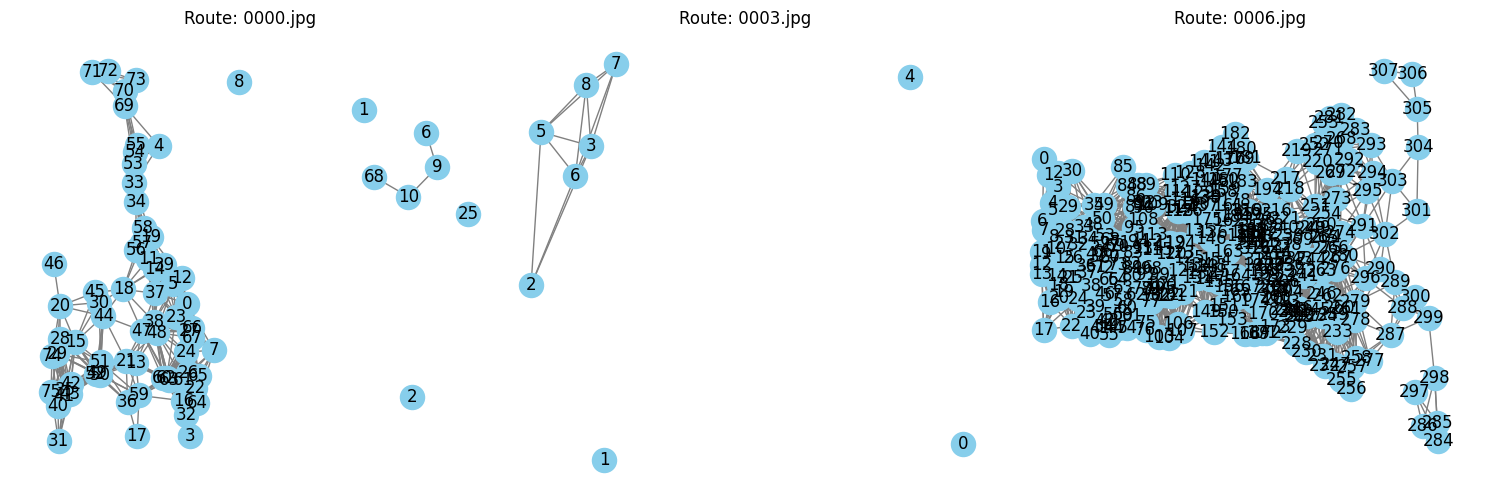

In [20]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, (img, holds) in enumerate(list(walls.items())[0:3]):
    G = rp.build_wall_graph(holds,300)
    pos = rp.nx.get_node_attributes(G, 'pos')
    rp.nx.draw(G, pos, ax=axs[i], with_labels=True, node_color='skyblue', edge_color='gray')
    axs[i].set_title(f"Route: {img}")
    axs[i].invert_yaxis()

plt.tight_layout()
plt.show()

# Sort

In [21]:
walls = pd.DataFrame(list(walls.items()),columns=["name","points"])

In [22]:
from route_parser import sort_climbing_points

walls["sorted_points"] = walls["points"].apply(sort_climbing_points)

In [23]:
walls = walls.drop("points",axis=1)
walls = walls.rename(columns={"sorted_points":"points"})

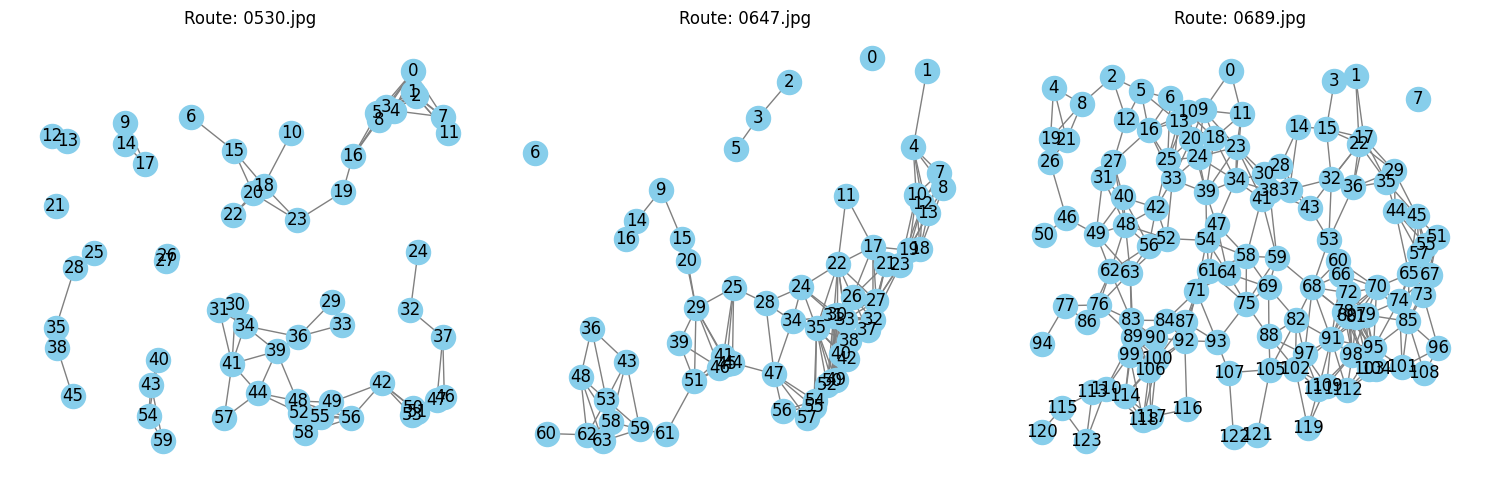

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 选择三条路线数据（第 10 至 12 行）
subset = walls.iloc[10:13]

for i, row in subset.iterrows():
    img = row["name"]
    holds = row["points"]  # 注意已经是 list，不需要 eval

    # 构图
    G = rp.build_wall_graph(holds,300)
    pos = rp.nx.get_node_attributes(G, 'pos')

    # 绘图
    rp.nx.draw(G, pos, ax=axs[i - 10], with_labels=True, node_color='skyblue', edge_color='gray')
    axs[i - 10].set_title(f"Route: {img}")
    axs[i-10].invert_yaxis()

plt.tight_layout()
plt.show()

In [11]:
walls

,name,points
0,0000.jpg,"[(379.7, 16.4), (276.7692307692308, 21.6923076..."
1,0003.jpg,"[(1294.6666666666667, 4.666666666666667), (231..."
2,0006.jpg,"[(2325.0, 24.642857142857142), (2517.25, 36.75..."
3,0074.jpg,"[(2128.5, 214.65384615384616), (2247.933333333..."
4,0075.jpg,"[(2371.0, 38.54545454545455), (1506.0, 267.5),..."
5,0132.jpg,"[(773.7857142857143, 8.857142857142858), (947...."
6,0274.jpg,"[(2518.1666666666665, 9.0), (1674.181818181818..."
7,0457.jpg,"[(1940.6666666666667, 5.666666666666667), (152..."
8,0502.jpg,"[(1467.8181818181818, 36.63636363636363), (124..."
9,0518.jpg,"[(59.916666666666664, 102.66666666666667), (27..."


In [12]:
walls.to_csv("climbing_data_sorted.csv")

# Simulate the Routes

In [8]:
from route_parser import simulate_route_from_wall, plot_simulated_routes

walls = pd.read_csv("climbing_data.csv")
walls["parsed_points"] = walls["points"].apply(ast.literal_eval)
all_points = walls.iloc[0]["parsed_points"]

In [8]:
simulated_routes = [simulate_route_from_wall(all_points, max_reach=600, num_holds=12) for _ in range(5)]

In [9]:
# Use Wall 0
simulated_routes_df = pd.DataFrame({"route_id": [f"sim_0{i}" for i in range(len(simulated_routes))],"points": simulated_routes})

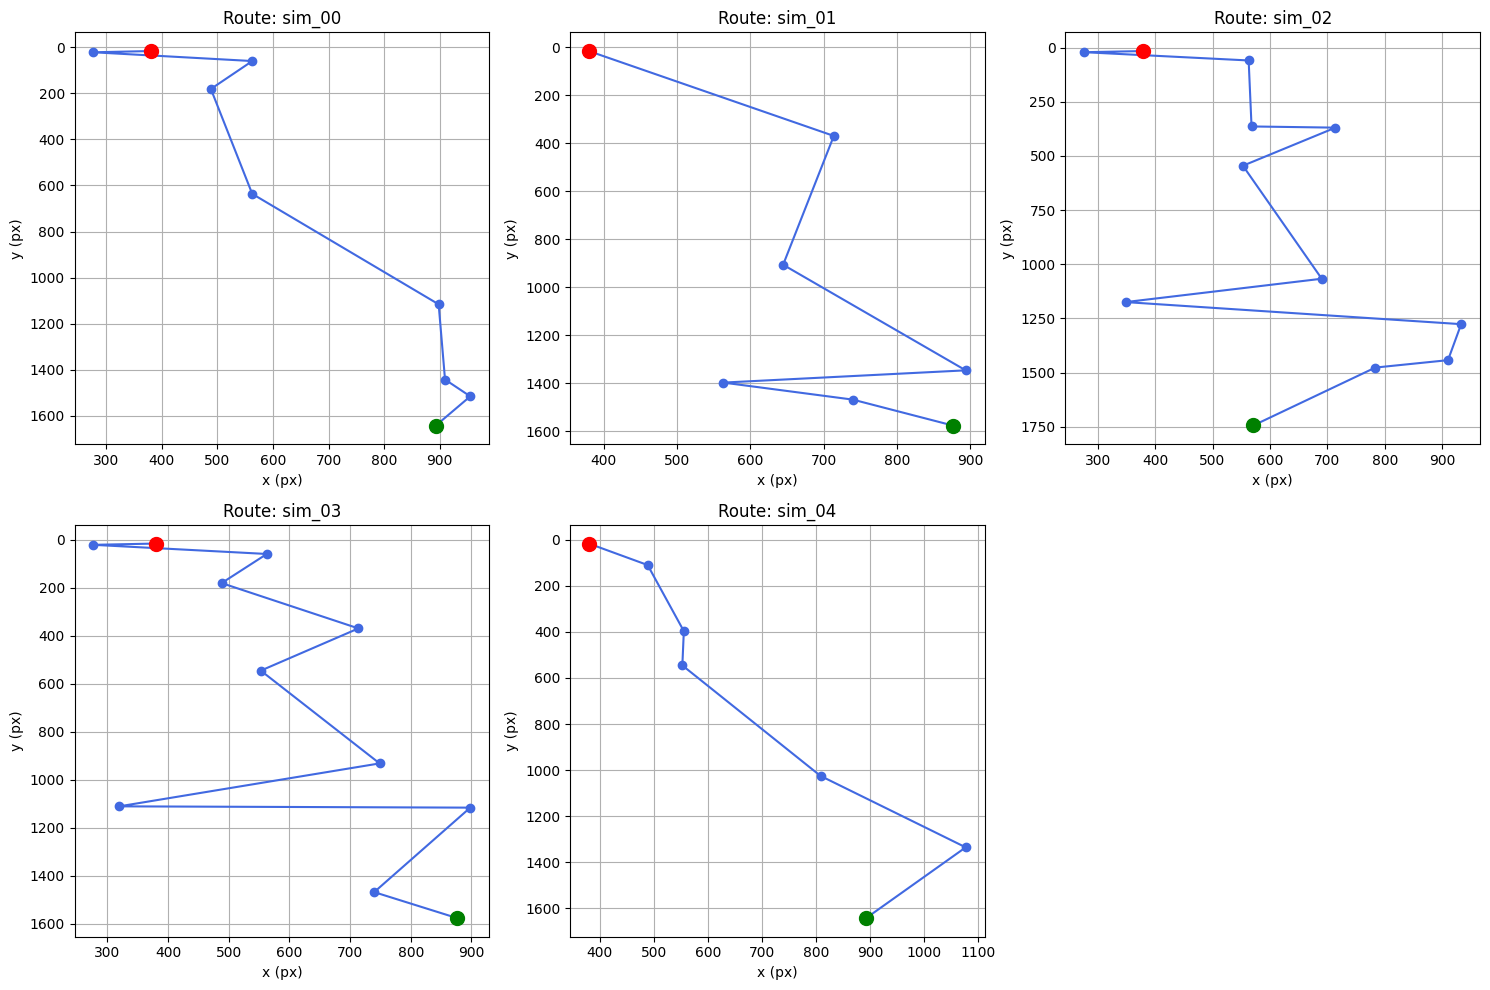

In [10]:
plot_simulated_routes(simulated_routes_df)

In [11]:
# Need to simulate 5 routes for each wall

for i in range(1,15):
    all_points = walls.iloc[i]["parsed_points"]
    simulated_routes = [simulate_route_from_wall(all_points, max_reach=600, num_holds=12) for _ in range(5)]
    simulated_routes_df_single = pd.DataFrame({"route_id": [f"sim_{i}{j}" for j in range(len(simulated_routes))],"points": simulated_routes})
    simulated_routes_df = pd.concat([simulated_routes_df,simulated_routes_df_single],ignore_index=True)
    

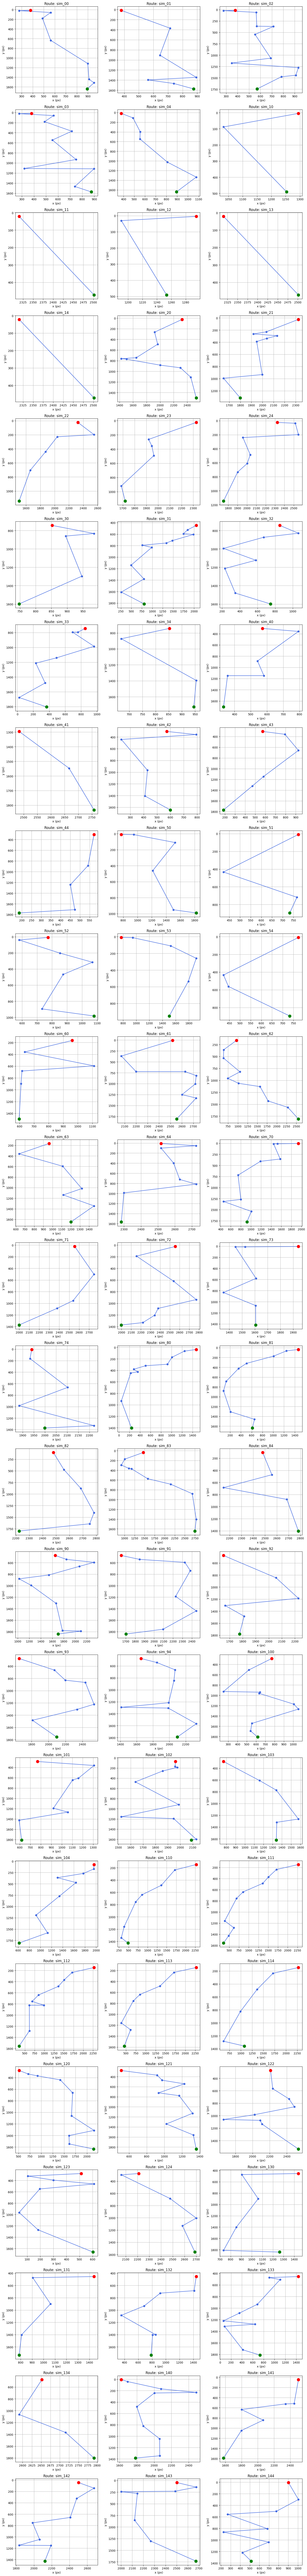

In [12]:
plot_simulated_routes(simulated_routes_df)

In [28]:
simulated_routes_df.to_csv("simulated_routes.csv")